Одна з найбільш поширених **проблем**, що зустрічаються в computer science - це проблема сортування якогось набору даних.

Сортування - одна з найкраще вивчених областей CS і це має ефект в тому числі на те, що вам майже ніколи не доведеться реалізовувати свої алгоритми сортування. Але важливо розуміти деякі властивості цього класу алгоритмів, щоб навіть з готових імплементацій обрати правильну.

Також, алгоритми сортування іноді є прекрасним ілюстративним прикладом для **дизайну алгоритмів**.

In [1]:
SIZE = 1000

In [2]:
original_lst = list(range(SIZE))

In [3]:
import random

Перший алгоритм сортування, що ми розглянемо, називається selection sort.
Він влаштований дуже просто: два вкладених цикли порівнюють елементи між собою. 
В кінці другого цикла найменший елемент та елемент з першого цикла міняють місцям.

Асимптотична складність:

* Найгірший випадок: O(n**2)
* Найкращий випадок: O(n**2)
* Середній випадок: O(n**2)

[Народний танок в якості ілюстрації](https://youtu.be/0-W8OEwLebQ?list=PLOmdoKois7_FK-ySGwHBkltzB11snW7KQ)

In [4]:
def selection_sort(arr):
    size = len(arr)
    for i in range(size):
        min = i
        for j in range(i, size):
            if arr[j] < arr[min]:
                min = j
        arr[i], arr[min] = arr[min], arr[i]

In [5]:
random.shuffle(original_lst)
print(original_lst)
selection_sort(original_lst)
print(original_lst)

[968, 674, 408, 519, 878, 692, 990, 42, 531, 803, 473, 186, 785, 974, 439, 973, 433, 241, 805, 583, 108, 716, 97, 294, 246, 747, 883, 733, 507, 124, 932, 37, 564, 704, 917, 591, 649, 13, 396, 158, 406, 625, 81, 708, 656, 909, 729, 641, 21, 49, 866, 770, 293, 935, 143, 857, 66, 843, 340, 256, 620, 121, 663, 391, 39, 790, 648, 615, 732, 823, 227, 120, 530, 89, 481, 247, 212, 69, 962, 133, 213, 416, 744, 449, 19, 835, 894, 62, 637, 577, 36, 635, 257, 147, 442, 755, 882, 586, 9, 378, 809, 885, 276, 399, 445, 944, 712, 331, 72, 841, 777, 796, 730, 239, 73, 982, 205, 881, 584, 68, 978, 123, 912, 808, 15, 707, 455, 240, 797, 913, 363, 967, 118, 34, 548, 524, 122, 41, 337, 402, 711, 306, 268, 155, 323, 220, 117, 383, 817, 529, 784, 67, 164, 315, 409, 741, 927, 812, 756, 907, 831, 453, 847, 677, 994, 949, 447, 782, 228, 86, 61, 816, 515, 575, 499, 924, 939, 224, 460, 451, 366, 260, 801, 330, 151, 54, 618, 798, 359, 601, 963, 895, 780, 748, 875, 10, 140, 761, 517, 694, 307, 325, 379, 910, 384, 5

In [6]:
%%timeit

random.shuffle(original_lst)
selection_sort(original_lst)

12.7 ms ± 286 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
import random

from time import time
from functools import partial
from typing import Callable, Union, List, Iterable


def function_timer(function: Callable):
    start_time = time()
    function()
    return time() - start_time

def time_algs_by_mean(func: Callable, 
                      test_num: int, 
                      range_bounds: List[int], 
                      type_constr: type = list,
                      preparation: Callable = lambda arr: arr) -> List[float]:
    algorith_times = list()
    for range_bound in range_bounds:
        arr = preparation(type_constr(range(range_bound)))
        times_for_n: List[float] = [function_timer(
        partial(func,
                arr = arr,)
        ) for _ in range(test_num)]
        mean_running_time = sum(times_for_n)/len(times_for_n)
        algorith_times.append(mean_running_time)
    return algorith_times

In [8]:
def shuffle_pure_func(arr):
    random.shuffle(arr)
    return arr

def reverse_arr(arr):
    return arr[::-1]

In [9]:
RANGE_BOUND_MAX = 200
TESTS_NUM = 100

range_bounds = list(range(10, RANGE_BOUND_MAX))

selection_times: List[float] = time_algs_by_mean(selection_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)
selection_times_reverse: List[float] = time_algs_by_mean(selection_sort, TESTS_NUM, range_bounds, list, reverse_arr)
selection_times_already_sorted: List[float] = time_algs_by_mean(selection_sort, TESTS_NUM, range_bounds, list)

In [10]:
import matplotlib.pyplot as plt

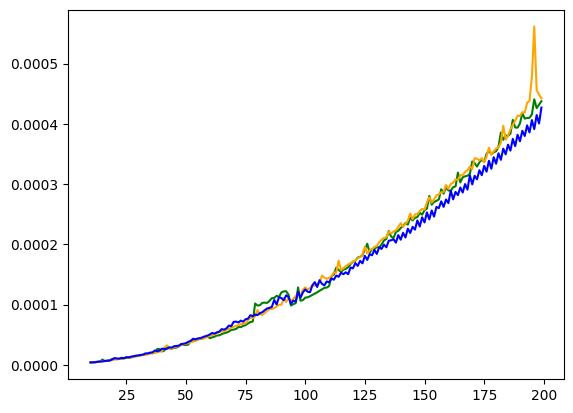

In [11]:
plt.plot(range_bounds, selection_times, color = "green")
plt.plot(range_bounds, selection_times_reverse, color = "orange")
plt.plot(range_bounds, selection_times_already_sorted, color = "blue")

Наступний алгоритм - insertion sort. За принципом роботи він схожий на перемішування карт у руці.

Асимптотична складність:

* Найгірший випадок: O(n**2)
* Найкращий випадок: O(n)
* Середній випадок: O(n**2)

[Народний танок для ілюстрації алгоритму](https://youtu.be/EdIKIf9mHk0?list=PLOmdoKois7_FK-ySGwHBkltzB11snW7KQ)

In [12]:
def insertion_sort(arr):
    size = len(arr)
    for i in range(1, size):
        j = i - 1
        key = arr[i]
        while arr[j] > key and j >= 0:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

In [13]:
random.shuffle(original_lst)
print(original_lst)
insertion_sort(original_lst)
print(original_lst)

[910, 441, 533, 757, 552, 613, 205, 968, 843, 796, 486, 8, 834, 628, 563, 494, 181, 908, 402, 807, 84, 604, 202, 709, 292, 389, 156, 327, 37, 210, 699, 452, 845, 163, 668, 481, 884, 705, 381, 822, 435, 864, 89, 548, 256, 137, 943, 546, 427, 617, 250, 648, 13, 362, 654, 971, 119, 623, 981, 818, 138, 869, 263, 188, 487, 900, 795, 454, 201, 687, 303, 994, 413, 808, 258, 631, 658, 306, 626, 606, 682, 305, 804, 659, 126, 26, 25, 118, 436, 175, 489, 524, 615, 343, 195, 472, 583, 94, 28, 279, 567, 511, 360, 383, 111, 632, 934, 372, 721, 301, 239, 691, 185, 718, 919, 287, 459, 93, 79, 763, 284, 199, 63, 121, 574, 580, 990, 375, 571, 474, 367, 191, 614, 802, 660, 987, 424, 46, 332, 889, 844, 275, 483, 498, 418, 618, 883, 304, 277, 923, 550, 43, 345, 702, 35, 133, 31, 789, 646, 537, 506, 335, 373, 395, 860, 409, 963, 465, 663, 80, 6, 11, 371, 15, 27, 842, 401, 222, 365, 223, 320, 14, 451, 339, 828, 603, 697, 141, 344, 500, 950, 267, 117, 678, 326, 995, 731, 726, 103, 208, 969, 198, 667, 771, 315

In [14]:
%%timeit

random.shuffle(original_lst)
insertion_sort(original_lst)

11.9 ms ± 182 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
RANGE_BOUND_MAX = 200
TESTS_NUM = 1000

range_bounds = list(range(10, RANGE_BOUND_MAX))

In [16]:
insertion_times: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)
insertion_times_reverse: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, reverse_arr)
insertion_times_already_sorted: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list)

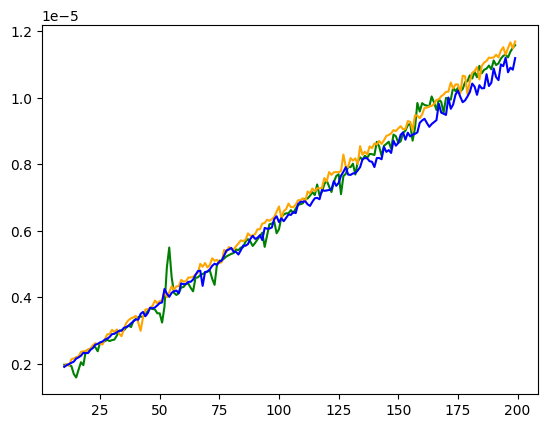

In [17]:
plt.plot(range_bounds, insertion_times, color = "green")
plt.plot(range_bounds, insertion_times_reverse, color = "orange")
plt.plot(range_bounds, insertion_times_already_sorted, color = "blue")

In [18]:
RANGE_BOUND_START = 10
RANGE_BOUND_MAX = 1000
TESTS_NUM = 50

range_bounds = list(range(RANGE_BOUND_START, RANGE_BOUND_MAX))

In [19]:
insertion_times_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)


In [20]:
insertion_times_reverse_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, reverse_arr)

In [21]:
insertion_times_already_sorted_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list)

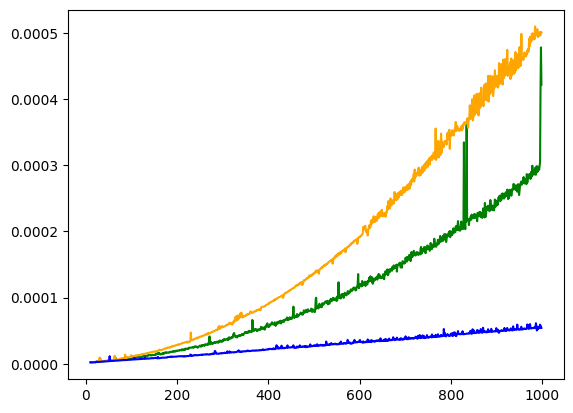

In [22]:
plt.plot(range_bounds, insertion_times_big_arr, color = "green")
plt.plot(range_bounds, insertion_times_reverse_big_arr, color = "orange")
plt.plot(range_bounds, insertion_times_already_sorted_big_arr, color = "blue")

Сортування вставками має декілька важливих властивостей:

* Це in-place алгоритм (споживає тільки О(1) пам'яті). Це ж поширюється і на selection sort.
* Це стабільний алгоритм (якщо ви відсортуєте список об'єктів спочатку за одним полем, а потім за іншим, порядок, встановлений за першим полем, буде збережено)
* Це онлайн-алгоритм (він здатен сортувати без отримання всього набору елементів за раз)
* Цей алгоритм працює за **лінійний час** на так званих частково відсортованих послідовностях (вона є такою, якщо елемент знаходиться не більше ніж у k позиціях від істиної). Повна оцінка тоді буде O(k*n)

Сортування вставками іноді використовується як додаткова частина гібридних алгоритмів сортування (наприклад у стандартному алгоритмі сортування Python під назвою Timsort)

Існує узагальнення сортування вставками, що дозволяє порівнювати нам елементи на відстані більше ніж 1. Воно носить назву сортування Шелла.

Асимптотична складність:

* Найгірший випадок - O(n**2)
* Найкращий випадок - O(n*log(n))
* Середній випадок - **невідомий**

[Народний танок для ілюстрації алгоритму](https://youtu.be/yn0EgXHb5jc?list=PLOmdoKois7_FK-ySGwHBkltzB11snW7KQ)

Власне, сам принцип сортування Шелла базується на порівнянні елементів, що рівновіддалені на деяке число k по індексу. Після проходження до кінця масиву, цей k зменшується певним чином, щоб, в кінці кінців, сталося порівняння кожного елементу з наступним. Відомо, що асимптотична складність сортування Шелла дуже сильно залежить саме від виду цих послідовностей. Для імплементації нижче використана так звана послідовність Кнута.

In [23]:
from typing import List, TypeVar

T = TypeVar("T")


def shell_sort(array_to_sort: List[T]) -> None:
    """From the signature we know that our method does not return anything.
    Basically it performs the side effect: it sorts the variable array_to_sort and treats it as mutable"""
    array_length: int = len(array_to_sort)
    shell_sort_step: int = 1
    # Recursively founding the closest member of Knuths sequence
    while shell_sort_step <= array_length // 3:
        shell_sort_step = 3 * shell_sort_step + 1
    while shell_sort_step > 0:
        # First loop maintains the Shellsort step ascending sequence
        for pointer in range(shell_sort_step, array_length, 1):
            # Second loop maintains the pointer for each h-sorting iterations
            # It's important to maintain the item_to_compare variable as it
            # stores our value for compare with other memmbers of h-sequence
            item_to_compare: T = array_to_sort[pointer]
            for decremented_pointer in range(pointer, 0, -shell_sort_step):
                # Third loop maintains insertion sort with the step value h.
                # It will iterate through the whole array with step h.
                preceeding_item: T = array_to_sort[
                    decremented_pointer - shell_sort_step
                ]
                item: T = array_to_sort[decremented_pointer]
                if preceeding_item > item:
                    # We are doing the swap in the following technique because we need to swap within array
                    array_to_sort[decremented_pointer] = preceeding_item
                    array_to_sort[decremented_pointer - shell_sort_step] = item
                if preceeding_item < item_to_compare:
                    # When we found the item which less than item we compare, we stop the swap process
                    array_to_sort[decremented_pointer] = item_to_compare
                    break
        shell_sort_step = shell_sort_step // 3

In [24]:
random.shuffle(original_lst)
print(original_lst)
shell_sort(original_lst)
print(original_lst)

[479, 394, 13, 895, 549, 612, 705, 335, 14, 377, 880, 422, 264, 251, 736, 469, 22, 121, 122, 850, 566, 88, 270, 929, 483, 517, 831, 65, 489, 124, 509, 343, 523, 994, 769, 395, 864, 27, 760, 819, 58, 515, 505, 189, 243, 992, 368, 326, 875, 49, 478, 628, 314, 274, 668, 642, 615, 863, 785, 46, 168, 485, 694, 21, 466, 970, 938, 482, 38, 526, 304, 595, 950, 324, 387, 688, 767, 236, 978, 686, 915, 7, 675, 828, 580, 26, 126, 781, 276, 4, 847, 114, 484, 849, 331, 738, 254, 475, 441, 355, 192, 417, 258, 837, 216, 735, 176, 532, 435, 108, 111, 650, 554, 319, 547, 74, 855, 480, 596, 623, 922, 887, 878, 955, 430, 808, 214, 238, 361, 891, 252, 868, 334, 116, 848, 19, 210, 844, 598, 939, 29, 646, 926, 341, 75, 879, 445, 892, 712, 310, 266, 960, 234, 752, 302, 62, 854, 309, 654, 283, 988, 508, 164, 787, 620, 934, 762, 601, 871, 497, 773, 588, 977, 424, 823, 550, 499, 739, 68, 573, 782, 256, 710, 16, 507, 300, 110, 255, 815, 358, 449, 792, 672, 567, 931, 329, 916, 772, 488, 810, 464, 797, 181, 98, 814

In [25]:
%%timeit

random.shuffle(original_lst)
shell_sort(original_lst)

3.61 ms ± 54.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
shell_sort_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)


In [27]:
shell_sort_reverse_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, reverse_arr)

In [28]:
shell_sort_already_sorted_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list)

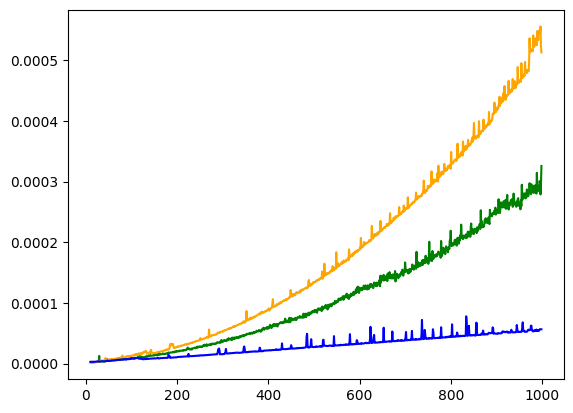

In [29]:
plt.plot(range_bounds, shell_sort_big_arr, color = "green")
plt.plot(range_bounds, shell_sort_reverse_big_arr, color = "orange")
plt.plot(range_bounds, shell_sort_already_sorted_big_arr, color = "blue")

Сортування Шелла:
* Адаптивне (працює швидше якщо вхідні дані частково відсортовані, див. сортування вставкою)
* Нестабільне

Наступний алгоритм - merge sort. 

Асимптотична оцінка:

* Найгірший випадок: O(n*log(n))
* Найкращий випадок: O(n*log(n))
* Середній випадок: O(n*log(n))

[Народний танок](https://youtu.be/dENca26N6V4?list=PLOmdoKois7_FK-ySGwHBkltzB11snW7KQ)

З точки зору дизайну алгоритмів, сортування злиттям є еталонним прикладом техніки divide-and-conquer. Алгоритми цього типу складаються з трьох частин:

* Divide - розбити проблему на підчастини
* Conquer - вирішити проблему для кожної частини окремо
* Combine - зібрати загальне рішення з результатів попереднього етапу

In [30]:
from typing import List, TypeVar

T = TypeVar("T")


def merge_sort(arr: List[T]) -> None:
    """From the signature we know that our method does not return anything.
    Basically it performs the side effect: it sorts the variable arr and treats it as mutable"""
    if len(arr) > 1:
        mid_index: int = len(arr) // 2
        #DIVIDE
        left_subarray: List[T] = arr[:mid_index]
        right_subarray: List[T] = arr[mid_index:]
        #CONQUER
        merge_sort(left_subarray)
        merge_sort(right_subarray)
        #COMBINE
        merge(arr, left_subarray, right_subarray)


def merge(
    arr: List[T], left_subarray: List[T], right_subarray: List[T]
) -> None:
    # Two iterators for traversing the two halves
    left_pointer: int = 0
    right_pointer: int = 0

    # Iterator for the main list
    original_array_pointer: int = 0

    while left_pointer < len(left_subarray) and right_pointer < len(right_subarray):
        if left_subarray[left_pointer] <= right_subarray[right_pointer]:
            # The value from the left half has been used
            arr[original_array_pointer] = left_subarray[left_pointer]
            # Move the iterator forward
            left_pointer += 1
        else:
            arr[original_array_pointer] = right_subarray[right_pointer]
            # The value from right half has been used
            right_pointer += 1
        # Move to the next slot in main array
        original_array_pointer += 1

    # For all the remaining values in either left or right array
    # we perform merge as we know that they are greater than already merged values
    while left_pointer < len(left_subarray):
        arr[original_array_pointer] = left_subarray[left_pointer]
        left_pointer += 1
        original_array_pointer += 1

    while right_pointer < len(right_subarray):
        arr[original_array_pointer] = right_subarray[right_pointer]
        right_pointer += 1
        original_array_pointer += 1

In [31]:
random.shuffle(original_lst)
print(original_lst)
merge_sort(original_lst)
print(original_lst)

[33, 640, 874, 52, 873, 798, 526, 859, 686, 461, 392, 878, 978, 984, 289, 928, 217, 328, 408, 744, 128, 55, 732, 743, 191, 198, 824, 907, 653, 628, 226, 29, 494, 290, 858, 655, 999, 410, 901, 925, 170, 375, 279, 28, 880, 871, 49, 90, 865, 592, 264, 184, 73, 876, 214, 850, 311, 206, 157, 398, 935, 679, 118, 583, 929, 450, 683, 699, 439, 316, 777, 278, 203, 717, 587, 792, 330, 102, 502, 47, 441, 591, 224, 631, 342, 934, 387, 343, 7, 3, 663, 657, 534, 920, 677, 234, 276, 773, 248, 416, 641, 602, 69, 664, 779, 297, 280, 86, 147, 672, 265, 983, 237, 348, 962, 852, 349, 770, 192, 595, 926, 303, 123, 896, 360, 51, 621, 284, 546, 748, 632, 662, 975, 393, 367, 302, 313, 782, 4, 804, 568, 31, 359, 620, 270, 785, 803, 25, 250, 298, 565, 974, 201, 820, 650, 373, 906, 449, 638, 938, 855, 272, 434, 133, 91, 547, 531, 166, 345, 162, 96, 462, 635, 834, 752, 246, 513, 432, 236, 405, 335, 406, 365, 733, 493, 875, 937, 67, 599, 401, 700, 453, 332, 687, 973, 258, 306, 868, 735, 155, 943, 753, 814, 418, 13

In [32]:
%%timeit

random.shuffle(original_lst)
merge_sort(original_lst)

1.28 ms ± 7.62 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [33]:
merge_sort_big_arr: List[float] = time_algs_by_mean(merge_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)

In [34]:
merge_sort_reverse_big_arr: List[float] = time_algs_by_mean(merge_sort, TESTS_NUM, range_bounds, list, reverse_arr)

In [35]:
merge_sort_already_sorted_big_arr: List[float] = time_algs_by_mean(merge_sort, TESTS_NUM, range_bounds, list)

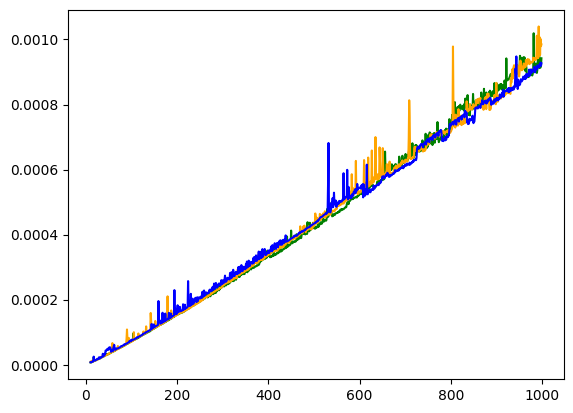

In [36]:
plt.plot(range_bounds, merge_sort_big_arr, color = "green")
plt.plot(range_bounds, merge_sort_reverse_big_arr, color = "orange")
plt.plot(range_bounds, merge_sort_already_sorted_big_arr, color = "blue")

Властивості merge sort:

* Стабільність
* НЕ-inplace (O(n) додаткової спожитої пам'яті). In-place імплементації **теоретично** можливі, але вважаються занадто складними для реалізації

Існує теорема з доволі простим доведенням про верхню межу **кількості порівнянь** для будь якого comparison-based алгоритму сортування.
Ця верхня межа дорівнює **O(n*log(n))** (насправді, там використовується нотація Big Omega).

Це слідує з кількості можливих перестановок в масиві і побудованому дереві прийняття рішень (можемо розібрати, якщо цікаво).

Всі розглянуті в цьому уроці алгоритми сортування є comparison-based. 

З цієї теореми є наслідок: merge sort і heap sort (поза нашим розглядом) є **асимптотично оптимальними** порівняльними алгоритмами сортування, тому що їхній перфоманс **у найгіршому випадку** описується як О(n*log(n)).

Але це не значить, що merge sort або heapsort є **найшвидшими** алгоритмом у **середньому** та **найкращому** випадках. У найкращому випадку їх може "обігнати" insertion sort.

У середньому випадку існує як мінімум один comparison-based алгоритм, котрий фактично є швидшим від усі інші відомі порівняльні алгоритми. Він носить назву **quicksort**.

In [37]:
from random import choice

T = TypeVar("T")


def quicksort_not_inplace(arr: List[T]) -> List[T]:
    """This quicksort implementation is NOT IN PLACE. 
    It uses O(n) additional memory!!
    But it works really fast in Python and it's easy to implement"""
    if len(arr) == 0: 
        return list()
    pivot = arr[0]
    l = quicksort_not_inplace([x for x in arr[1:] if x < pivot])
    u = quicksort_not_inplace([x for x in arr[1:] if x >= pivot])
    return l + [pivot] + u


In [38]:
from typing import List, TypeVar
from random import randint

T = TypeVar("T")


def shuffle(arr: List[T]) -> None:
    """Simple implementation for Fisher-Yates shuffle algo"""
    array_length: int = len(arr)
    for index in range(array_length - 1, 0, -1):
        random_index: int = randint(0, index)
        arr[index], arr[random_index] = arr[random_index], arr[index]


def partition(arr, begin, end):
    pivot = begin
    for i in range(begin + 1, end + 1):
        if arr[i] <= arr[begin]:
            pivot += 1
            arr[i], arr[pivot] = arr[pivot], arr[i]
    arr[pivot], arr[begin] = arr[begin], arr[pivot]
    return pivot


def quicksort(arr, begin=0, end=None):
    shuffle(arr)
    if end is None:
        end = len(arr) - 1

    def _quicksort(arr, begin, end):
        if begin >= end:
            return
        pivot = partition(arr, begin, end)
        _quicksort(arr, begin, pivot - 1)
        _quicksort(arr, pivot + 1, end)

    return _quicksort(arr, begin, end)

Асимптотична оцінка:

* Найгірший випадок: O(n**2), в основному коли масив відсортований (у будь який бік)
* Найкращий випадок: O(n*log(n))
* Середній випадок: O(n*log(n))

* Додаткова пам'ять: O(log(n)), O(n) для наївної імплементації

[Народний танок](https://www.youtube.com/watch?v=3San3uKKHgg)

In [39]:
random.shuffle(original_lst)
print(original_lst)
print(quicksort_not_inplace(original_lst))

[285, 59, 100, 511, 191, 145, 462, 227, 36, 148, 824, 308, 29, 522, 995, 186, 944, 896, 557, 875, 571, 35, 872, 353, 488, 203, 40, 548, 267, 660, 0, 561, 255, 496, 289, 416, 218, 893, 883, 299, 881, 301, 537, 543, 111, 124, 785, 864, 181, 969, 887, 640, 806, 494, 165, 647, 485, 363, 750, 222, 443, 466, 931, 845, 623, 335, 671, 406, 986, 313, 376, 716, 584, 698, 497, 612, 207, 570, 738, 456, 796, 375, 876, 509, 116, 231, 550, 513, 265, 326, 990, 562, 390, 826, 439, 530, 128, 795, 734, 744, 86, 474, 611, 781, 697, 242, 212, 409, 575, 195, 122, 551, 852, 269, 642, 370, 90, 508, 560, 498, 268, 634, 146, 81, 989, 107, 133, 46, 77, 219, 838, 291, 752, 307, 391, 344, 600, 866, 930, 357, 766, 211, 467, 805, 683, 529, 935, 531, 596, 54, 862, 987, 719, 434, 846, 506, 624, 290, 199, 798, 691, 465, 579, 91, 607, 32, 653, 682, 928, 495, 768, 673, 152, 53, 756, 213, 42, 460, 956, 314, 822, 157, 101, 727, 74, 943, 200, 70, 527, 903, 615, 793, 722, 66, 853, 871, 360, 905, 155, 119, 105, 936, 9, 837, 5

In [40]:
random.shuffle(original_lst)
print(original_lst)
quicksort(original_lst)
print(original_lst)

[722, 398, 473, 135, 124, 255, 707, 744, 782, 157, 375, 220, 182, 638, 800, 672, 180, 414, 710, 337, 640, 953, 341, 128, 600, 568, 5, 576, 699, 87, 410, 69, 321, 117, 122, 367, 785, 816, 748, 813, 919, 88, 318, 114, 554, 843, 390, 750, 550, 425, 58, 828, 262, 517, 978, 633, 274, 996, 938, 343, 134, 436, 63, 427, 360, 17, 570, 547, 219, 16, 897, 482, 519, 660, 763, 753, 786, 580, 12, 502, 210, 733, 290, 365, 8, 235, 969, 746, 336, 36, 761, 629, 161, 866, 258, 781, 626, 33, 674, 960, 962, 864, 430, 64, 301, 838, 715, 51, 525, 23, 229, 564, 577, 541, 904, 890, 797, 190, 787, 681, 947, 276, 172, 7, 542, 415, 500, 282, 269, 563, 902, 913, 470, 468, 267, 232, 579, 106, 754, 616, 648, 951, 697, 628, 225, 964, 670, 758, 695, 325, 551, 291, 420, 863, 833, 151, 371, 472, 485, 112, 582, 742, 449, 959, 637, 898, 57, 821, 242, 240, 668, 340, 327, 899, 653, 853, 364, 32, 454, 438, 560, 465, 443, 41, 362, 909, 711, 894, 917, 212, 572, 590, 632, 956, 820, 642, 606, 851, 712, 948, 0, 832, 706, 85, 666,

In [41]:
%%timeit

random.shuffle(original_lst)
merge_sort(original_lst)

1.32 ms ± 26.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [42]:
quicksort_big_arr: List[float] = time_algs_by_mean(quicksort_not_inplace, TESTS_NUM, range_bounds, list, shuffle_pure_func)

In [43]:
quicksort_big_arr_inplace: List[float] = time_algs_by_mean(quicksort, TESTS_NUM, range_bounds, list, shuffle_pure_func)

In [44]:
quicksort_reverse_big_arr: List[float] = time_algs_by_mean(quicksort_not_inplace, TESTS_NUM, range_bounds, list, reverse_arr)

In [45]:
quicksort_already_sorted_big_arr: List[float] = time_algs_by_mean(quicksort_not_inplace, TESTS_NUM, range_bounds, list)

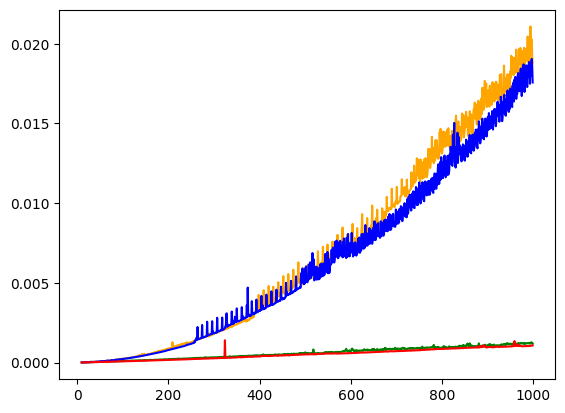

In [46]:
plt.plot(range_bounds, quicksort_big_arr, color = "green")
plt.plot(range_bounds, quicksort_reverse_big_arr, color = "orange")
plt.plot(range_bounds, quicksort_already_sorted_big_arr, color = "blue")
plt.plot(range_bounds, quicksort_big_arr_inplace, color = "red")

Властивості:

* НЕ стабільний (але існують стабільні модифікації)
* In-place (не робить зайвих копій вхідних даних, хоча можливі не-in-place імплементації)
* Divide-and-conquer
* З урахуванням усіх констант є найшвидшим з comparison-based алгоритмів в **середньому** випадку **на нескінченності**